In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

pd.options.display.max_columns
df = pd.read_csv('df_all_rs.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('index', axis=1)
df = df.sort_values(by="GAME_DATE_EST")

In [2]:
df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1188,2003-10-28,20300003,1610612747,1610612742,2003,1610612747,109.0,0.506,0.600,0.350,32.0,46.0,1610612742,93.0,0.376,0.733,0.280,17.0,46.0,1
1187,2003-10-28,20300002,1610612759,1610612756,2003,1610612759,83.0,0.425,0.769,0.100,20.0,38.0,1610612756,82.0,0.361,0.810,0.500,14.0,43.0,1
1186,2003-10-28,20300001,1610612755,1610612748,2003,1610612755,89.0,0.440,0.533,0.350,25.0,39.0,1610612748,74.0,0.408,0.824,0.250,16.0,44.0,1
1185,2003-10-29,20300012,1610612762,1610612757,2003,1610612762,99.0,0.575,0.714,0.556,25.0,29.0,1610612757,92.0,0.429,0.762,0.333,20.0,40.0,1
1184,2003-10-29,20300006,1610612740,1610612737,2003,1610612740,88.0,0.324,0.700,0.160,24.0,55.0,1610612737,83.0,0.398,0.737,0.214,18.0,58.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18173,2019-04-10,21801225,1610612763,1610612744,2018,1610612763,132.0,0.490,0.833,0.457,25.0,49.0,1610612744,117.0,0.500,0.857,0.433,32.0,39.0,1
18172,2019-04-10,21801224,1610612755,1610612741,2018,1610612755,125.0,0.559,0.600,0.462,30.0,47.0,1610612741,109.0,0.474,0.667,0.375,21.0,39.0,1
18171,2019-04-10,21801223,1610612752,1610612765,2018,1610612752,89.0,0.403,0.720,0.300,23.0,33.0,1610612765,115.0,0.482,0.950,0.424,25.0,56.0,0
18170,2019-04-10,21801222,1610612766,1610612753,2018,1610612766,114.0,0.526,0.889,0.276,21.0,32.0,1610612753,122.0,0.545,0.750,0.367,24.0,39.0,0


In [3]:
rs_2003 = ('2003-10-28', '2004-04-14')
rs_2004 = ('2004-11-02', '2005-04-20')
rs_2005 = ('2005-11-01', '2006-04-19')
rs_2006 = ('2006-10-31', '2007-04-18')
rs_2007 = ('2007-10-30', '2008-04-16')    
rs_2008 = ('2008-10-28', '2009-04-16')
rs_2009 = ('2009-10-27', '2010-04-14')
rs_2010 = ('2010-10-26', '2011-04-13')
rs_2011 = ('2011-12-25', '2012-04-26')
rs_2012 = ('2012-10-30', '2013-04-17')
rs_2013 = ('2013-10-29', '2014-04-16')
rs_2014 = ('2014-10-28', '2015-04-15')
rs_2015 = ('2015-10-27', '2016-04-13')
rs_2016 = ('2016-10-25', '2017-04-12')
rs_2017 = ('2017-10-17', '2018-04-11')
rs_2018 = ('2018-10-16', '2019-04-10')

In [4]:
target = df['HOME_TEAM_WINS']
data = df[['FG_PCT_home','FG_PCT_away','FG3_PCT_home','FG3_PCT_away','AST_home','REB_home','AST_away','REB_away']]

data_copy = data.copy()
normalized_data = (data_copy - data_copy.mean()) / data_copy.std()

In [5]:
def evaluar_metricas(estimator, data, target):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    #mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    #rmse = np.sqrt(mse)
    
    return mse

In [48]:
metrics_mse_kn = pd.DataFrame(columns=['NUM_NEIGHBORS', 'MSE'])

In [49]:
for j in range (1,11):
    i = 1
    for i in range(1, 501, 20):
        kn = KNeighborsRegressor(n_neighbors=i)
        metrics_mse_kn.loc[len(metrics_mse_kn)+1] = [i,evaluar_metricas(kn, normalized_data,target)]
    
metrics_mse_kn

,NUM_NEIGHBORS,MSE
1,1.0,0.249072
2,21.0,0.124477
3,41.0,0.121741
4,61.0,0.115631
5,81.0,0.119587
...,...,...
246,401.0,0.123698
247,421.0,0.122785
248,441.0,0.122137
249,461.0,0.123393


In [50]:
metrics_mse_kn.groupby(['NUM_NEIGHBORS']).mean()

,MSE
NUM_NEIGHBORS,
1.0,0.244041
21.0,0.124256
41.0,0.121551
61.0,0.120090
81.0,0.119358
101.0,0.120314
121.0,0.119430
141.0,0.120940
161.0,0.120594


In [71]:
metrics_mse_kn.groupby(['NUM_NEIGHBORS'])['NUM_NEIGHBORS']

ValueError: x and y must be the same size

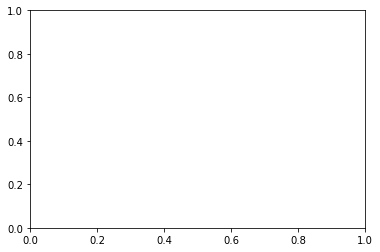

In [70]:
plt.scatter(metrics_mse_kn.groupby(['NUM_NEIGHBORS'])['NUM_NEIGHBORS'],metrics_mse_kn.groupby(['NUM_NEIGHBORS']).mean()['MSE'])